In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [2]:
# Importing the dataset
dataset_ = pd.read_excel("USMassShootings.xlsx")

In [3]:
len(dataset_.index)

71

In [4]:
dataset_.head()

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,...,Yes,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,Yes,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,...,Yes,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,No,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,...,No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,...,NaN,Unknown,Two handguns and a butcher knife,2,No,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,9/16/2013,2013,"Aaron Alexis, 34, a military veteran and contr...",12,...,Yes,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,No,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530


In [5]:
pd.set_option('display.max_columns', None)
dataset_.head()

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,WOUNDED,TOTALVICTIMS,LOCATIONTYPE,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,2,7,Military,Yes,"Abdulazeez ""had suffered for years from depres...",Yes,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,Yes,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,1,10,Religious,No,NaN,Yes,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,No,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,1,6,School,No,"Fryberg was well-liked and allegedly happy, bu...",No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,2,6,Other,No,NaN,NaN,Unknown,Two handguns and a butcher knife,2,No,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,9/16/2013,2013,"Aaron Alexis, 34, a military veteran and contr...",12,8,20,Military,Yes,Had told Rhode Island police the prior month t...,Yes,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,No,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530


In [6]:
dataset = dataset_.iloc[:,[11,18]]

In [7]:
x = dataset.iloc[:,:1]

In [8]:
y = dataset.iloc[:,1:]

In [9]:
dataset = dataset.head(10)

In [10]:
print(x)

    TOTALVICTIMS
0              7
1             10
2              6
3              6
4             20
..           ...
66            20
67            21
68            41
69             7
70            11

[71 rows x 1 columns]


In [11]:
print(y)

    NUMWEAPONS
0            3
1            1
2            1
3            2
4            1
..         ...
66           3
67           3
68           3
69           1
70           1

[71 rows x 1 columns]


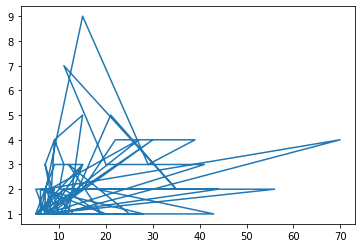

In [12]:
plt.plot(x,y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 0)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regressor=LinearRegression()

In [16]:
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred=regressor.predict(x_test)

In [18]:
y_pred

array([[2.07909088],
       [2.21086143],
       [2.05273677],
       [2.34263198],
       [2.1317991 ],
       [2.02638266],
       [2.00002855],
       [2.1317991 ],
       [2.26356965],
       [2.15815321],
       [2.26356965],
       [2.05273677],
       [2.15815321],
       [2.26356965],
       [2.07909088]])

In [19]:
y_test

,NUMWEAPONS
26,2
27,1
48,1
22,2
30,2
51,2
7,2
59,1
34,3
70,1


In [20]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mse = round(mse,3)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
rmse = round(rmse,3)
mae = mean_absolute_error(y_test, y_pred)
mae = round(mae,3)
print(f"The mean squared error is : {mse}")
print(f"The root mean squared error is: {rmse}")
print(f"The root mean absolute error is: {mae}")

The mean squared error is : 0.632
The root mean squared error is: 0.795
The root mean absolute error is: 0.656


In [21]:
c = regressor.score(y_test, y_pred)

In [22]:
print(f"The accuracy scores is: {c}.")

The accuracy scores is: -5.370510396975421.
